In [3]:
%pylab inline
import pandas as pd
import scipy.stats as stats
import numpy.random as random

Populating the interactive namespace from numpy and matplotlib


In [14]:
height_df = pd.read_csv("heights.csv", names = ["heights"])

In [16]:
heights = height_df.values

# Part A

In [68]:
ndata = len(height_df)
mean = np.mean(heights)
sigma = np.std(heights)
print("Mean of sample: ", mean)

tfactor = stats.t.ppf(1-0.16,ndata-1)
print('T-distribution 68% Confidence Interval: ', mean-tfactor*sigma/np.sqrt(ndata), mean+tfactor*sigma/np.sqrt(ndata) )
tfactor = stats.t.ppf(1-0.025,len(heights)-1)
print('T-distribution 95% Confidence Interval: ', mean-tfactor*sigma/np.sqrt(ndata), mean+tfactor*sigma/np.sqrt(ndata) )
tfactor = stats.t.ppf(1-0.005,len(heights)-1)
print('T-distribution 99% Confidence Interval: ', mean-tfactor*sigma/np.sqrt(ndata), mean+tfactor*sigma/np.sqrt(ndata) )

Mean of sample:  1.7173384615384617
T-distribution 68% Confidence Interval:  1.6890627695344844 1.745614153542439
T-distribution 95% Confidence Interval:  1.6579523750286176 1.7767245480483058
T-distribution 99% Confidence Interval:  1.634083420182413 1.8005935028945104


## Interpretation of confidence intervals

We are 68% confident that the true mean height of Americans lies between 1.69 and 1.75 meters.

We are 95% confident that the true mean height of Americans lies between 1.66 and 1.78 meters.

We are 99% confident that the true mean height of Americans lies between 1.63 and 1.80 meters.

# Part B

In [59]:
#Generating Bootstrap data
nbootstraps=int(1E4)
heights_boot = np.random.choice(height_df.heights, (nbootstraps,ndata))

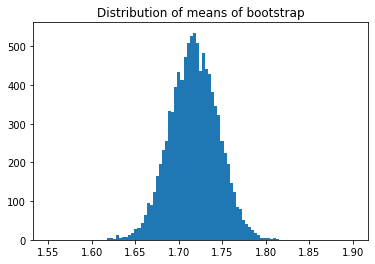

In [66]:
#Looking at bootstrap distribution of mean
means = np.mean(heights_boot, axis = 1)
plt.hist(means, bins = np.linspace(1.55, 1.9, 100))
plt.title("Distribution of means of bootstrap")
plt.show()

In [65]:
print('Bootstrap 68% Confidence Interval: ', np.percentile(means, [16, 84]) )
print('Bootstrap 95% Confidence Interval: ', np.percentile(means, [2.5, 97.5]) )
print('Bootstrap 99% Confidence Interval: ', np.percentile(means, [0.5, 99.5]) )

Bootstrap 68% Confidence Interval:  [1.69023077 1.74472308]
Bootstrap 95% Confidence Interval:  [1.66341538 1.77076923]
Bootstrap 99% Confidence Interval:  [1.64479615 1.78741538]


The bootstrap intervals are centered on similar values to the T intervals, but the bootstrap intervals are smaller than the T intervals, particularly for the 99% interval, where the difference in interval size is approximately 0.02 meters (2 cm). Thus, in this case, bootstrap is more constraining than the T distribution.

# Part C

The true mean height of Americans (1.7 m) is contained in all of our confidence intervals, even the 68% bootstrap, which is our narrowest CI. Thus, to first order, our class is a representative sample of the US population when it comes to height. However, our confidence intervals are centered slightly higher (~1.72 m) than the true mean height, which indicates that our class is about 2 cm taller than the US average.